# Orbit Shape Problem - Numerical Solution

Previously, we solved the equation $$\frac{\partial^2 u}{\partial \phi^2} + u = \left( m/l \right)^2 GM \tag{1}$$ given $u(\phi) = \frac{1}{r(\phi)}$. 

Now, we want to see if we can generate a parabolic orbit after including the Schwarzschild radius (given by the choice of metric), via 

$$\frac{\partial^2 u}{\partial \phi^2} - \frac{r_s}{2} \left( \frac{\partial u}{\partial \phi} \right)^2 - u\left(1 - r_s u\right) = \left(\frac{m}{l}\right)^2 GM \tag{2}$$

We will proceed by the update method (Euler approximation method) of the differential of $\frac{\partial^2 u}{\partial \phi^2}$

where our values are given by 

* $m =$     1
* $r_0 =$   7e3       $[\textrm{km}]$
* $G =$     6.674e-20 $[\textrm{km}^3\ \textrm{kg}^{-1} \textrm{s}^{-2}]$
* $M =$     5.9720e24 $[\textrm{kg}]$
* $v_0 =$   6.307 $[\textrm{km}\ \textrm{s}^{-1}]$
* $l = m \cdot v_0 \cdot r_0 =$  4.4149e4
* $\Rightarrow^* \left(m / l\right)^2 GM =$ 2.0449e-04
* $\phi_0 =$ 0 
* $\Delta =$ 0.005

We will also specify a numerical value for $r_s$ assuming Schwarzschild radius of the Earth, 8.87 $[\textrm{mm}] \approx$ 8.87e-6 $[\textrm{km}]$.


Furthermore, because our problem is "stiff" and contains some sensitivity to parameters in terms of its numerical stability, we will attempt to implement this using the "backward" or "Implicit" Euler method instead of the Explicit/Forward method presented in class (due to the tendency of the absolute error to oscillate when approaching a solution, it is not numerically stable). 

For more information, refer to "**Project 1.3 - _Numerical Methods for ODEs_**" on pg. 36 of [Tveito, Aslak, and Ragnar Winther. Introduction to partial differential equations: a computational approach. Vol. 29. Springer Science & Business Media, 2004.].  Another resource discussing the same issues is present under **Stability of forward Euler for the simple harmonic oscillator** at https://math.libretexts.org/Bookshelves/Differential_Equations/Numerically_Solving_Ordinary_Differential_Equations_(Brorson)/01%3A_Chapters/1.02%3A_Forward_Euler_method.

It may be of some further interest to utilize the **Crank-Nicholson Central-Finite-Difference method** (in the future) for additional computation speed, stability, and accuracy, compared to the aforementioned methods. 

---

**NOTE :>** AHA i actually messed up the derivation. Let's just do an incorrect forward Euler to match the spreadsheet from class. 

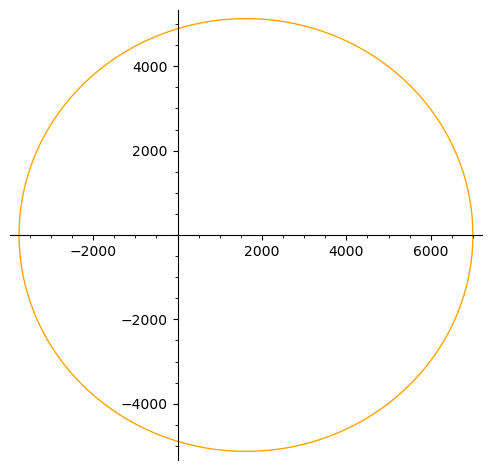

In [14]:
import numpy as np
from sage.plot.polygon import polygon2d, Polygon
from sage.plot.circle import Circle

𝚫_h = 1e-4                      # step-size, radians
m = 1                           # for simplicity

r_0 = np.float32(7.0e3)         # [km]
v_0 = np.float32(6.307)         # [km s^-1]

r_s = np.float32(8.87e-6)       # [km]
G = np.float32(6.674e-20)       # [km^3 kg^-1 s^-2]
M = np.float32(5.9720e24)       # [kg]
l = m * v_0 * r_0               # conserve angular momentum

𝚫𝛗 = np.arange(0, 2*np.pi, 𝚫_h, dtype=np.float32) # grid values of 𝛗 to eval at

u = np.zeros(len(𝚫𝛗), dtype=np.float32) # soln. of diff. eqns. of motion
u[0] = 1 / r_0                          # IV

du_n = 0
for n in range(0, len(𝚫𝛗)-1):
    du_n = (𝚫_h * ( ((m/l)^2 * G * M) - u[n] )) + du_n
    u[n+1] = u[n] + (𝚫_h * du_n)

# Let's print using using a Polygon, representing line segment connections between the 
#   points where we evaluated the function. 
# There is also a neat trick to do this with a 3d interactive plot that's web-enabled, points, a sphere representing Earth, etc.,
#   but let's keep it simple for now. 
polygon2d(
    [ ((1./_u) * cos(_𝛗), (1./_u) * sin(_𝛗)) for (_𝛗, _u) in zip(𝚫𝛗, u) ],
    fill=False,
    color='orange'
)
